In [36]:
import pandas as pd
import numpy as np

In [37]:
df = pd.read_csv('FAOSTAT_data_7-10-2021.csv')
df.sample(5)

,Area,Element,Item,Year,Unit,Value
1260,Italy,Area harvested,Asparagus,1991,ha,5793.0
960,France,Area harvested,Asparagus,2012,ha,4490.0
1734,Peru,Area harvested,Asparagus,1967,ha,1180.0
354,Canada,Area harvested,Asparagus,1993,ha,1481.0
2304,United States of America,Area harvested,Asparagus,1994,ha,31060.0


In [38]:
df.shape

(2418, 6)

In [39]:
df.isnull().sum()

Area         0
Element      0
Item         0
Year         0
Unit         0
Value      537
dtype: int64

In [40]:
df = df.dropna()

In [41]:
df = df.groupby('Year')['Value'].sum().reset_index()

In [42]:
df.head()

,Year,Value
0,1961,1160003.0
1,1962,871849.0
2,1963,765013.0
3,1964,710106.0
4,1965,721255.0


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

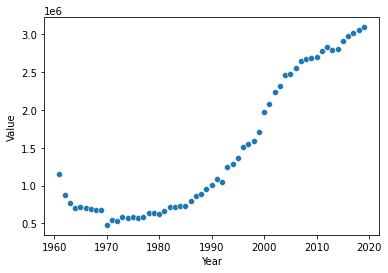

In [44]:
sns.scatterplot(x=df['Year'], y=df['Value'])
plt.show()

In [50]:
X = df.drop(columns='Value')
y = df['Year']

################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =42)

In [63]:
def predict_with_regressors(X_train, y_train, X_test, y_test):

    # import Regression Models
    from sklearn.linear_model import Ridge, Lasso, ElasticNet
    from sklearn.svm import SVR
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neural_network import MLPRegressor
    from sklearn.linear_model import LinearRegression
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor

    # import metrics
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    from sklearn.metrics import explained_variance_score, mean_squared_log_error
    from sklearn.metrics import mean_absolute_percentage_error

    # Instantiate the regressors
    regressors = {
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'Elastic Net': ElasticNet(),
        'SVM': SVR(),
        'KNN': KNeighborsRegressor(),
        'GBR': GradientBoostingRegressor(),
        'MLP': MLPRegressor(),
        'Linear': LinearRegression(),
        'Tree': DecisionTreeRegressor(),
        'Forest': RandomForestRegressor()
    }

    # train and make predictions with each regressor
    regressions = {}
    for model_name, model in regressors.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        metrics = {
            'Mean Squared Error': mean_squared_error(y_test, y_pred),
            'Mean Absolute Error': mean_absolute_error(y_test, y_pred),
            'R-squared': r2_score(y_test, y_pred),
            'Explained Variance Score': explained_variance_score(y_test, y_pred),
            'Mean Squared Logarithmic Error': mean_squared_log_error(y_test, y_pred),
            'Mean Absolute Percentage Error': mean_absolute_percentage_error(y_test, y_pred)
        }
        regressions[model_name] = metrics

    # Print the metrics in an organized format
    for model_name, metrics in regressions.items():
        print(f'{model_name}:')
        for metric_name, value in metrics.items():
            print(f'  - {metric_name}: {value}')

    return regressions



In [64]:
predict_with_regressors(X_train, y_train, X_test, y_test)

Ridge:
  - Mean Squared Error: 2.86142043379184e-06
  - Mean Absolute Error: 0.0015644640116268722
  - R-squared: 0.9999999931557474
  - Explained Variance Score: 0.9999999931602231
  - Mean Squared Logarithmic Error: 7.239040353782362e-13
  - Mean Absolute Percentage Error: 7.86811815569714e-07
Lasso:
  - Mean Squared Error: 0.00632192337819287
  - Mean Absolute Error: 0.07353589018017222
  - R-squared: 0.9999848785448157
  - Explained Variance Score: 0.9999848884335264
  - Mean Squared Logarithmic Error: 1.599358191133239e-09
  - Mean Absolute Percentage Error: 3.698321395197295e-05
Elastic Net:
  - Mean Squared Error: 0.006297419252566656
  - Mean Absolute Error: 0.07339323721896562
  - R-squared: 0.9999849371564147
  - Explained Variance Score: 0.9999849470067961
  - Mean Squared Logarithmic Error: 1.5931590105194056e-09
  - Mean Absolute Percentage Error: 3.6911469869290455e-05
SVM:
  - Mean Squared Error: 108.18027540216656
  - Mean Absolute Error: 8.189255311571722
  - R-squared

{'Ridge': {'Mean Squared Error': 2.86142043379184e-06,
  'Mean Absolute Error': 0.0015644640116268722,
  'R-squared': 0.9999999931557474,
  'Explained Variance Score': 0.9999999931602231,
  'Mean Squared Logarithmic Error': 7.239040353782362e-13,
  'Mean Absolute Percentage Error': 7.86811815569714e-07},
 'Lasso': {'Mean Squared Error': 0.00632192337819287,
  'Mean Absolute Error': 0.07353589018017222,
  'R-squared': 0.9999848785448157,
  'Explained Variance Score': 0.9999848884335264,
  'Mean Squared Logarithmic Error': 1.599358191133239e-09,
  'Mean Absolute Percentage Error': 3.698321395197295e-05},
 'Elastic Net': {'Mean Squared Error': 0.006297419252566656,
  'Mean Absolute Error': 0.07339323721896562,
  'R-squared': 0.9999849371564147,
  'Explained Variance Score': 0.9999849470067961,
  'Mean Squared Logarithmic Error': 1.5931590105194056e-09,
  'Mean Absolute Percentage Error': 3.6911469869290455e-05},
 'SVM': {'Mean Squared Error': 108.18027540216656,
  'Mean Absolute Error': 8